Saving Sport car price.csv to Sport car price (1).csv
Data loaded & cleaned. Shape: (954, 8)


,Car Make,Car Model,Year,Engine_L,Horsepower,Torque_lbft,ZeroToSixty_s,Price_USD
0,Porsche,911,2022,3.0,379,331.0,4.0,101200
1,Lamborghini,Huracan,2021,5.2,630,443.0,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561.0,3.0,333750
3,Audi,R8,2022,5.2,562,406.0,3.2,142700
4,McLaren,720S,2021,4.0,710,568.0,2.7,298000


,count,mean,std,min,25%,50%,75%,max
Engine_L,954.0,4.582495,4.444481,0.0,3.5,4.0,5.2,100.0
Horsepower,954.0,603.685535,381.869073,181.0,454.0,583.0,660.0,10000.0
Torque_lbft,954.0,520.027254,285.579335,151.0,398.0,505.0,590.0,7376.0
ZeroToSixty_s,954.0,3.584570,0.725164,1.9,3.0,3.5,4.0,6.5
Price_USD,954.0,341950.799790,688962.670637,25000.0,70925.0,124845.0,239775.0,5200000.0


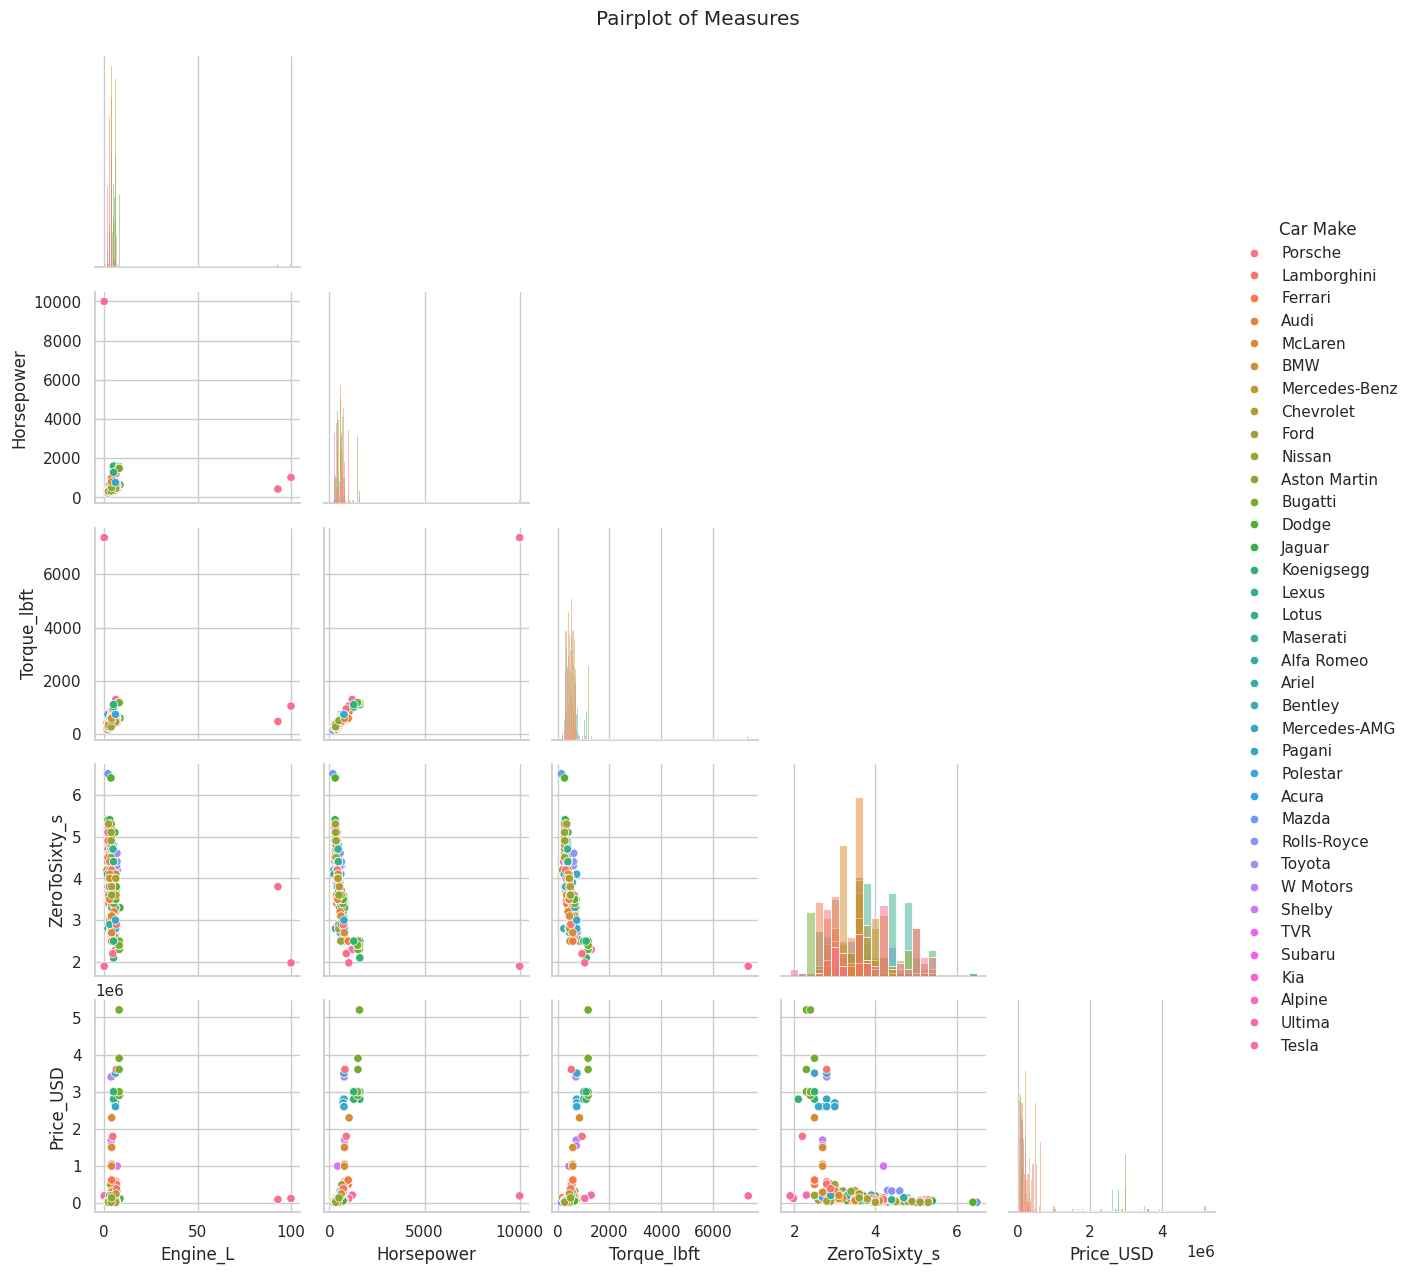

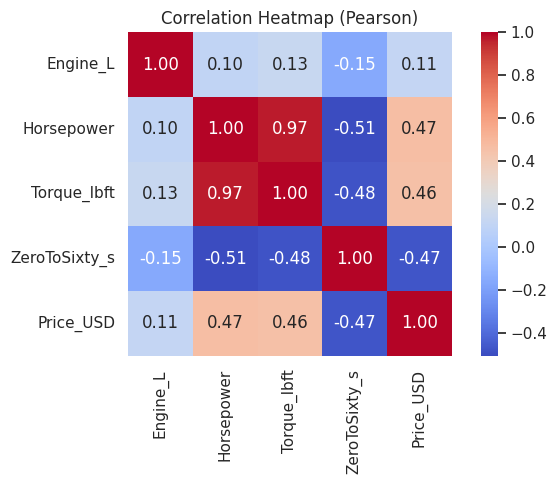

PCA explained variance ratio: [0.45748136 0.17356799]


,PC1_loading,PC2_loading
Horsepower,0.554398,0.138673
Torque_lbft,0.549761,0.126036
Price_USD,0.421772,-0.087417
Engine_L,0.139798,-0.563749
Year,-0.009058,0.797887
ZeroToSixty_s,-0.439192,0.052963


In [ ]:
# =======================
# Multivariate Analysis for "Sport car price.csv"
# =======================

# 1) Install deps (Colab)
!pip install -q pandas numpy matplotlib seaborn plotly scikit-learn

# 2) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Colab file upload
from google.colab import files
uploaded = files.upload()  # upload "Sport car price.csv"

# 3) Load data (adjust filename if needed)
FILENAME = "Sport car price.csv"
df = pd.read_csv(FILENAME)

# 4) Clean & standardize columns
# Strip whitespace from column names
df.columns = [c.strip() for c in df.columns]

# Expected columns in your dataset (seen earlier)
# ['Car Make','Car Model','Year','Engine Size (L)','Horsepower','Torque (lb-ft)',
#  '0-60 MPH Time (seconds)','Price (in USD)']

# Rename to simpler names (only if they exist)
rename_map = {
    "Engine Size (L)": "Engine_L",
    "Torque (lb-ft)": "Torque_lbft",
    "0-60 MPH Time (seconds)": "ZeroToSixty_s",
    "Price (in USD)": "Price_USD"
}
df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# Ensure numeric types (robust conversion)
def to_numeric_clean(series):
    if series.dtype == "O":
        series = series.astype(str).str.replace(r"[^\d\.\-]", "", regex=True)
    return pd.to_numeric(series, errors="coerce")

num_cols_candidates = ["Year", "Engine_L", "Horsepower", "Torque_lbft", "ZeroToSixty_s", "Price_USD"]
for col in num_cols_candidates:
    if col in df.columns:
        df[col] = to_numeric_clean(df[col])

# Drop rows missing the core measures (keep it gentle)
core_measures = [c for c in ["Engine_L","Horsepower","Torque_lbft","ZeroToSixty_s","Price_USD"] if c in df.columns]
df = df.dropna(subset=core_measures, how="any").reset_index(drop=True)

print("Data loaded & cleaned. Shape:", df.shape)
display(df.head())

# =======================
# 5) Descriptive statistics
# =======================
desc = df[["Engine_L","Horsepower","Torque_lbft","ZeroToSixty_s","Price_USD"]].describe().T
display(desc)

# =======================
# 6) Pairplot (Scatter Matrix)
# =======================
sns.set(style="whitegrid")
pair_cols = [c for c in ["Engine_L","Horsepower","Torque_lbft","ZeroToSixty_s","Price_USD"] if c in df.columns]
hue_col = "Car Make" if "Car Make" in df.columns else None

# Pairplot is safer with hist on diagonal
g = sns.pairplot(df[pair_cols + ([hue_col] if hue_col else [])], hue=hue_col, diag_kind="hist", corner=True)
g.fig.suptitle("Pairplot of Measures", y=1.02)
plt.show()

# =======================
# 7) Correlation Heatmap
# =======================
plt.figure(figsize=(7,5))
corr = df[pair_cols].corr(method="pearson")
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()

# =======================
# 8) 3D Scatter (Horsepower, Torque, Price)
# =======================
if all(col in df.columns for col in ["Horsepower","Torque_lbft","Price_USD"]):
    fig = px.scatter_3d(
        df,
        x="Horsepower", y="Torque_lbft", z="Price_USD",
        color=("Car Make" if "Car Make" in df.columns else None),
        size=("Engine_L" if "Engine_L" in df.columns else None),
        hover_name=("Car Model" if "Car Model" in df.columns else None),
        title="3D Scatter: Horsepower vs Torque vs Price"
    )
    fig.show()

# =======================
# 9) Bubble Plot (Horsepower vs Price) with Engine Size & 0-60
# =======================
xy_ok = all(c in df.columns for c in ["Horsepower","Price_USD"])
size_ok = "Engine_L" in df.columns
color_ok = "ZeroToSixty_s" in df.columns

if xy_ok:
    fig = px.scatter(
        df,
        x="Horsepower",
        y="Price_USD",
        size=("Engine_L" if size_ok else None),
        color=("ZeroToSixty_s" if color_ok else None),
        hover_name=("Car Model" if "Car Model" in df.columns else None),
        title="Bubble Plot: Horsepower vs Price (size=Engine, color=0–60)"
    )
    fig.show()

# =======================
# 10) Parallel Coordinates (multi-measure)
# =======================
# Parallel coords require all numeric; we color by Price_USD for readability.
pc_measures = [c for c in ["Engine_L","Horsepower","Torque_lbft","ZeroToSixty_s","Price_USD"] if c in df.columns]
if len(pc_measures) >= 3:
    fig = px.parallel_coordinates(
        df[pc_measures],
        color="Price_USD" if "Price_USD" in pc_measures else pc_measures[-1],
        title="Parallel Coordinates of Measures"
    )
    fig.show()

# =======================
# 11) PCA (reduce measures to 2D)
# =======================
# Prepare numeric features
features = [c for c in ["Engine_L","Horsepower","Torque_lbft","ZeroToSixty_s","Price_USD","Year"] if c in df.columns]
if len(features) >= 3:
    X = df[features].copy()
    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components=2, random_state=42)
    pcs = pca.fit_transform(X_scaled)

    pca_df = pd.DataFrame(pcs, columns=["PC1","PC2"])
    pca_df["Car Make"] = df["Car Make"] if "Car Make" in df.columns else "NA"
    pca_df["Car Model"] = df["Car Model"] if "Car Model" in df.columns else np.arange(len(df)).astype(str)
    pca_df["Price_USD"] = df["Price_USD"] if "Price_USD" in df.columns else np.nan

    # Variance explained
    evr = pca.explained_variance_ratio_
    print("PCA explained variance ratio:", evr)

    # PCA scatter
    fig = px.scatter(
        pca_df,
        x="PC1", y="PC2",
        color=("Car Make" if "Car Make" in pca_df.columns else None),
        size=("Price_USD" if "Price_USD" in pca_df.columns else None),
        hover_name="Car Model",
        title=f"PCA (2D) of Measures — Var Explained: PC1 {evr[0]:.2f}, PC2 {evr[1]:.2f}"
    )
    fig.show()

    # PCA loadings (feature contributions)
    loadings = pd.DataFrame(
        pca.components_.T,
        index=features,
        columns=["PC1_loading","PC2_loading"]
    )
    display(loadings.sort_values("PC1_loading", ascending=False))
